In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('../../Marketing-Sales-Prediction/Dummy_Data_HSS.csv')

data = data.drop(['TV', 'Social Media', 'Influencer'], axis=1)
data.columns

print(data.head())

       Radio       Sales
0   6.566231   54.732757
1   9.237765   46.677897
2  15.886446  150.177829
3  30.020028  298.246340
4   8.437408   56.594181


In [3]:
data.shape

(4572, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Radio   4568 non-null   float64
 1   Sales   4566 non-null   float64
dtypes: float64(2)
memory usage: 71.6 KB


In [5]:
data.describe()

,Radio,Sales
count,4568.000000,4566.000000
mean,18.160356,192.466602
std,9.676958,93.133092
min,0.000684,31.199409
25%,10.525957,112.322882
50%,17.859513,189.231172
75%,25.649730,272.507922
max,48.871161,364.079751


In [6]:
data.isnull().sum()/data.shape[0]*100

Radio    0.087489
Sales    0.131234
dtype: float64

In [7]:
data.fillna(data.mean(numeric_only = True),inplace = True)

In [8]:
data.duplicated().sum()

0

In [9]:
X = np.array(data['Radio'])
Y = np.array(data['Sales'])

In [10]:
print("X shape:", X.shape)
print("Y shape:", Y.shape)

X shape: (4572,)
Y shape: (4572,)


In [11]:
def reshape_col(col):
    return col.reshape((col.shape[0],1))


In [12]:
X = reshape_col(X)
Y = reshape_col(Y)

In [13]:
print("X shape:", X.shape)
print("Y shape:", Y.shape)

X shape: (4572, 1)
Y shape: (4572, 1)


Text(0, 0.5, 'Sales')

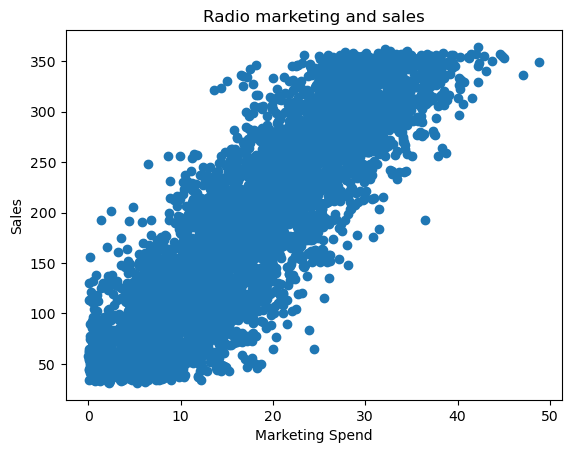

In [14]:
plt.scatter(X, Y)
plt.title("Radio marketing and sales")
plt.xlabel("Marketing Spend")
plt.ylabel("Sales")

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [17]:
y_test_pred = model.predict(X_test)


In [18]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_test_pred)
print(f'R² score: {r2:.2f}')


R² score: 0.75


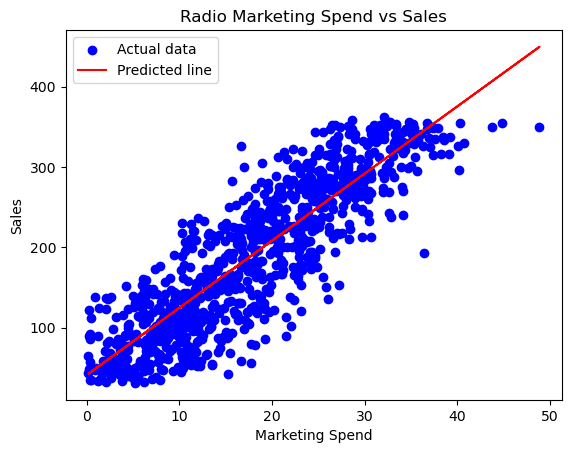

In [19]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_test_pred, color='red', label='Predicted line')
plt.xlabel('Marketing Spend')
plt.ylabel('Sales')
plt.title('Radio Marketing Spend vs Sales')
plt.legend()
plt.show()

In [20]:
print(y_test.shape)
print(y_test_pred.shape)


(915, 1)
(915, 1)


In [21]:
y_test = y_test.flatten()


In [22]:
y_pred = y_test_pred.reshape(-1, 1)


In [23]:
print(y_test.shape)
print(y_pred.shape)

(915,)
(915, 1)


In [24]:
y_test = y_test.ravel()
y_pred = y_pred.ravel()
residuals = y_test - y_pred


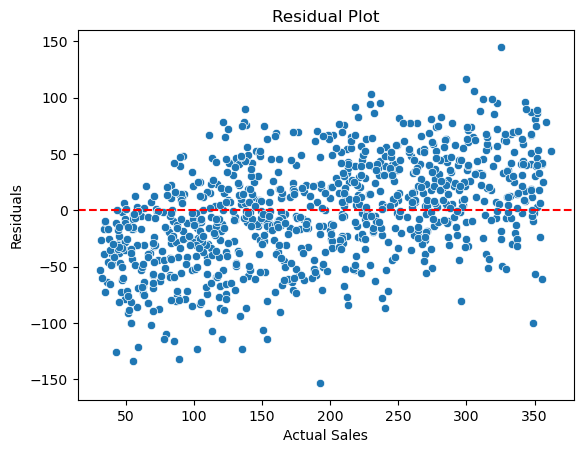

In [25]:
import seaborn as sns

residuals = y_test - y_pred
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predictions on the test set
y_pred = model.predict(X_test)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# R-squared (R²)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


MAE: 36.41
MSE: 2069.43
RMSE: 45.49
R²: 0.75
